# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : 월 초과사용시간이 고객 이탈여부에 영향이 있을 것이다.

* 가설2 : 월 사용 잔여시간이 고객 이탈여부에 영향이 있을 것이다.

* 가설3 : 평균 통화시간이 고객 이탈여부에 영향이 있을 것이다.

* 가설4 : 만족도 설문이 고객 이탈여부에 영향이 있을 것이다.

* 가설5 : 변경 계획 설문이 고객 이탈여부에 영향이 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1

In [3]:
feature = 'OVERAGE'

① 변수의 비즈니스 의미

> * 월 초과 사용시간(분)

② 숫자, 범주?

> * 숫자 데이터

③ NaN 존재 유무

In [4]:
mobile['OVERAGE'].isna().sum()

0

④ 기초통계량(수치화)

In [5]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포 확인(시각화)

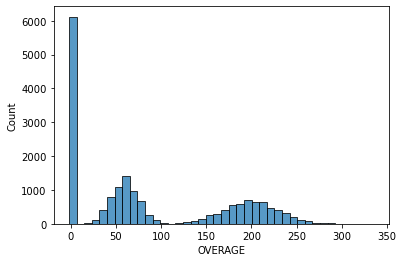

In [6]:
sns.histplot(mobile[feature], bins = 40)
plt.show()

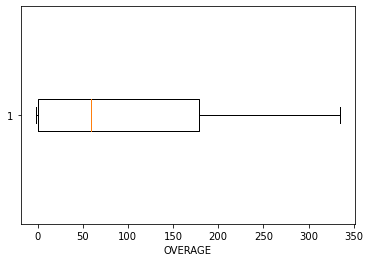

[ 0. -2.]
[179. 335.]


In [7]:
box = plt.boxplot(mobile[feature], vert = False)
plt.xlabel('OVERAGE')
plt.show()

print(box['whiskers'][0].get_xdata())

print(box['whiskers'][1].get_xdata())

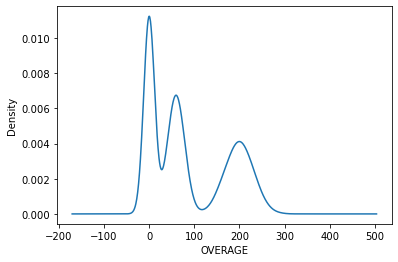

In [8]:
pd.Series(feature)
mobile[feature].plot(kind = 'kde') 
plt.xlabel('OVERAGE')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 월 초과 사용시간이 0인 고객을 제외하고 사용시간을 초과하는 그룹이 100분 기준 두 그룹으로 나뉜다.
> * 월 초과 사용시간이 0인 고객들이 다른 시간대에 비교하여 월등히 많다.

⑦ 추가 분석해 볼 사항이 있나요?

> * 월 초과 사용시간이 0인 고객이 충분히 많아 그 이유에 대해서 분석해볼 필요가 있다.

### 2) feature2

In [9]:
feature = 'LEFTOVER'

① 변수의 비즈니스 의미

> * 월 사용 잔여시간(분)

② 숫자, 범주?

> * 숫자 데이터

③ NaN 존재 유무

In [10]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [11]:
mobile[feature].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

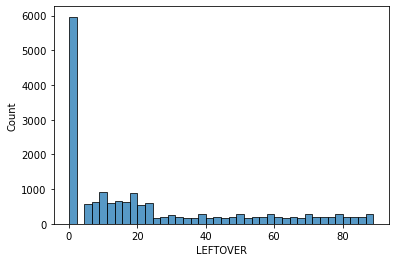

In [12]:
sns.histplot(mobile[feature], bins = 40)
plt.show()

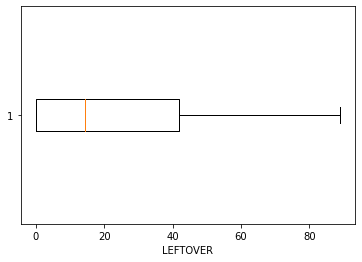

[0. 0.]
[42. 89.]


In [13]:
box = plt.boxplot(mobile[feature], vert = False)
plt.xlabel('LEFTOVER')
plt.show()

print(box['whiskers'][0].get_xdata())

print(box['whiskers'][1].get_xdata())

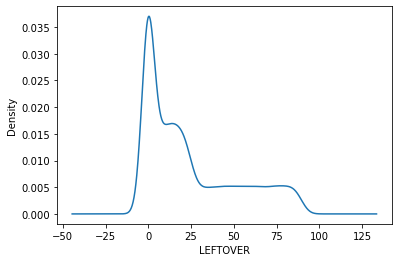

In [14]:
pd.Series(feature)
mobile[feature].plot(kind = 'kde') 
plt.xlabel('LEFTOVER')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 월 잔여시간이 0인 고객들을 제외하면 잔여시간 별 고객들의 수가 고르게 두 그룹으로 나뉜다.
> * 월 잔여시간이 0인 고객들이 비교하여 월등히 많다

⑦ 추가 분석해 볼 사항이 있나요?

> * 월 잔여시간이 0인 고객들을 대상으로 제공 시간이 부족하지는 않은지 조사해볼 필요가 있다.
> * 월 잔여시간이 40분 이상인 상위 25% 고객들을 대상으로 이유 혹은 불만사항에 대해 조사해 볼 필요가 있다.

### 3) feature3

In [15]:
feature = 'AVERAGE_CALL_DURATION'

① 변수의 비즈니스 의미

> * 평균 통화시간(분)

② 숫자, 범주?

> * 숫자 데이터

③ NaN 존재 유무

In [16]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [17]:
mobile[feature].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

⑤ 분포 확인(시각화)

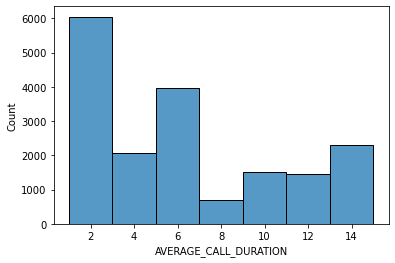

In [18]:
sns.histplot(mobile[feature], bins = 7)
plt.show()

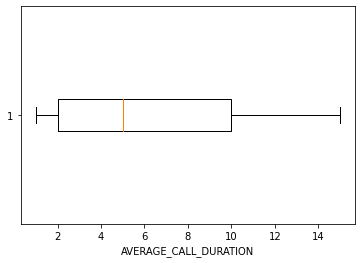

[2. 1.]
[10. 15.]


In [19]:
box = plt.boxplot(mobile[feature], vert = False)
plt.xlabel('AVERAGE_CALL_DURATION')
plt.show()

print(box['whiskers'][0].get_xdata())

print(box['whiskers'][1].get_xdata())

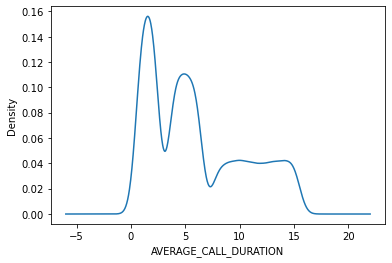

In [20]:
pd.Series(feature)
mobile[feature].plot(kind = 'kde') 
plt.xlabel('AVERAGE_CALL_DURATION')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 고객 절반의 평균 통화시간은 5분 정도이다.

⑦ 추가 분석해 볼 사항이 있나요?

> * 그룹으로 나누어 그룹별 만족도 조사를 해볼 필요가 있다.

### 4) feature4

In [21]:
feature = 'REPORTED_SATISFACTION'

① 변수의 비즈니스 의미

> * 만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )

② 숫자, 범주?

In [22]:
mobile[feature].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'], dtype=object)

> * 범주 데이터

③ NaN 존재 유무

In [23]:
mobile[feature].isna().sum()

38

④ 기초통계량(수치화)

In [24]:
print(mobile[feature].value_counts())
print(mobile[feature].value_counts()/ len(mobile[feature]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포 확인(시각화)

> 교차표

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


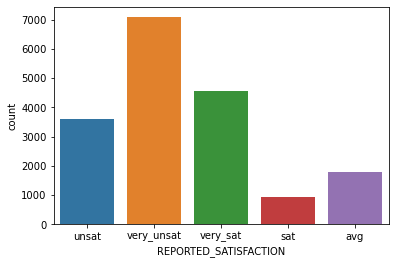

In [25]:
sns.countplot(mobile[feature]) #plt의 barplot 사용해서
plt.show()

[7072 4562 3590 1806  932]    Index(['very_unsat', 'very_sat', 'unsat', 'avg', 'sat'], dtype='object')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


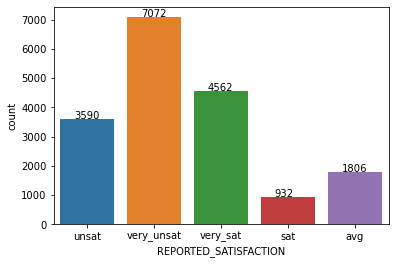

In [26]:
cnt = mobile[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(mobile[feature])


plt.text(0.8, cnt.values[0]+5, cnt.values[0])
plt.text(1.8, cnt.values[1]+5, cnt.values[1])
plt.text(-0.2, cnt.values[2]+5, cnt.values[2])
plt.text(3.8, cnt.values[3]+5, cnt.values[3])
plt.text(2.8, cnt.values[4]+5, cnt.values[4])

plt.show()

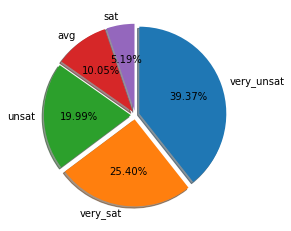

In [27]:
cnt = mobile[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()


⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * '불만족'과 '매우 불만족'을 표시한 고객이 전체 59.36%로 과반 이상을 차지한다.
> * '만족','매우 만족'을 표시한 고객이 전체 30.59%이다.

⑦ 추가 분석해 볼 사항이 있나요?

> * 부정적인 평가를 한 고객들의 이유를 조사해 볼 필요가 있다.
> * 부정적인 평가를 한 고객들의 실제 이탈 여부를 비교해 볼 필요가 있다.

### 5) feature5

In [28]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 변수의 비즈니스 의미

> * 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')

② 숫자, 범주?

> * 범주 데이터

③ NaN 존재 유무

In [29]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [30]:
print(mobile[feature].value_counts())
print(mobile[feature].value_counts()/ len(mobile[feature]))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


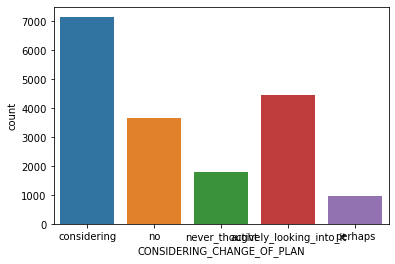

In [31]:
sns.countplot(mobile[feature]) #plt의 barplot 사용해서
plt.show()

[7141 4453 3644 1804  958]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


    Index(['considering', 'actively_looking_into_it', 'no', 'never_thought',
       'perhaps'],
      dtype='object')


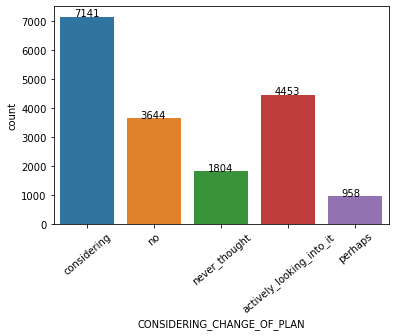

In [32]:
cnt = mobile[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(mobile[feature])

plt.text(-0.2, cnt.values[0]+5, cnt.values[0])
plt.text(2.8, cnt.values[1]+5, cnt.values[1])
plt.text(0.8, cnt.values[2]+5, cnt.values[2])
plt.text(1.8, cnt.values[3]+5, cnt.values[3])
plt.text(3.8, cnt.values[4]+5, cnt.values[4])
plt.xticks(rotation=40,fontsize=10)

plt.show()

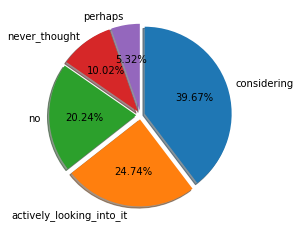

In [33]:
cnt = mobile[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()


⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * '절대 아니다','아니다'를 제외한 변경할 가능성이 있는 고객의 비율이 69.73으로 굉장히 높은 편이다.
> * 회사는 변경할 가능성이 있는 고객들을 유지시킬 수 있는 방안을 모색해야 한다.

⑦ 추가 분석해 볼 사항이 있나요?

> * 변경계획 조사와 실제 변경 조사를 비교하여 변경계획 조사의 신빙성을 검토해 볼 필요가 있다.

### 6) target

In [34]:
target = 'CHURN'

① 변수의 비즈니스 의미

> * 이탈여부(1 : 이탈, 0 : 잔류)

② 숫자, 범주?

> * 범주 데이터

③ NaN 존재 유무

In [35]:
mobile[target].isna().sum()

0

④ 기초통계량(수치화)

In [36]:
print(mobile[target].value_counts())
print(mobile[target].value_counts()/ len(mobile[target]))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


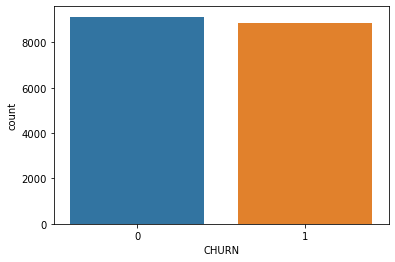

In [37]:
sns.countplot(mobile[target]) #plt의 barplot 사용해서
plt.show()

[9131 8869]    Int64Index([0, 1], dtype='int64')


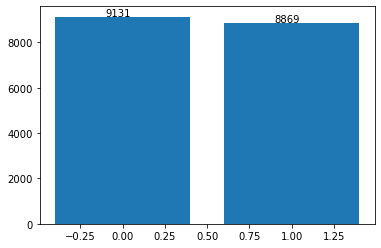

In [38]:
cnt = mobile[target].value_counts()
print(cnt.values,'  ',cnt.index)
plt.bar(cnt.index, cnt.values)

plt.text(-0.1, cnt.values[0]+5, cnt.values[0])
plt.text(0.9, cnt.values[1]+5, cnt.values[1])

plt.show()

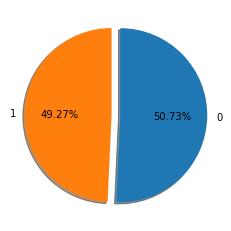

In [39]:
cnt = mobile[target].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.show()


⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 작은 차이지만 변경하지 않는 고객의 수가 과반 이상을 차지한다.
> * 고객의 절반 가까이 이탈하는 것은 회사에 큰 손해로 작용될 수 있다.

⑦ 추가 분석해 볼 사항이 있나요?

> * 실제 이탈 고객들을 대상으로 이탈 사유를 조사해 볼 필요가 있다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [40]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [41]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) feature --> CHURN

In [42]:
feature = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [43]:
pd.crosstab(mobile[target], mobile[feature])

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3543
1,854,440,1798,2228,3529


② 시각화( Stacked Bar, Mosaic)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


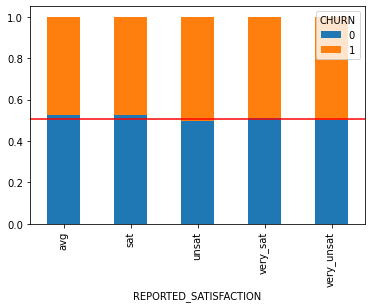

In [44]:
# 1) 집계
tmp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-mobile[target].mean(), color = 'r')
# plt.text(-0.1,0.51,mobile[target].mean())
plt.show()

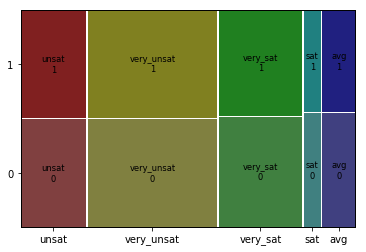

In [45]:

mosaic(mobile,[feature, target])

# 평균선 추가
# plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 부정적인 평가를 내린 고객들 중 이탈한 고객은 절반을 넘지 않는다.(49.996%)
> * 이탈한 고객 중 '매우 불만족'을 선택한 고객들이 가장 많다.(3529명)
> * 만족도 설문의 결과에서 이탈한 고객과 이탈하지 않은 고객이 1:1의 비율에 가깝다.
> * 만족도 설문은 실제 이탈 여부에 영향을 끼치지 않는다.

③ 가설검정(카이제곱검정)

In [46]:
table = pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
기대빈도
 [[ 916.27201871  472.84912593 1821.38236277 2314.5254426  3587.97104999]
 [ 889.72798129  459.15087407 1768.61763723 2247.4745574  3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * p-value가 0.144로 유의수준 0.05보다 크므로 대립가설을 기각하고, 귀무가설을 지지한다.
> * 만족도 설문의 결과가 실제 이탈 여부에 영향을 끼칠 것이라는 대립가설을 기각하고 귀무가설을 지지한다

#### 2) feature --> CHURN

In [47]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [48]:
pd.crosstab(mobile[target], mobile[feature])

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,2278,3648,926,1823,456
1,2175,3493,878,1821,502


② 시각화( Stacked Bar, Mosaic)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


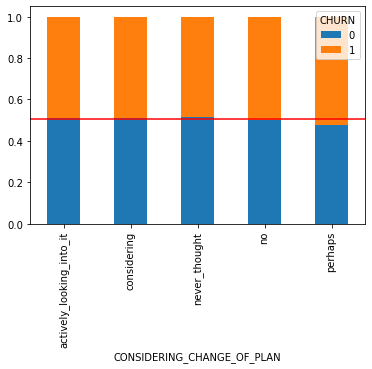

In [49]:
# 1) 집계
tmp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

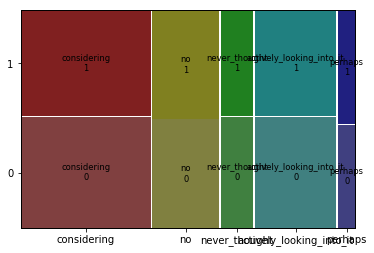

In [50]:
mosaic(mobile,[feature, target])

# 평균선 추가
# plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 모든 선택지에서 이탈한 고객과 이탈하지 않은 고객이 1:1의 비율에 가깝다.
> * 변경 계획 설문은 실제 이탈 여부에 영향을 끼치지 않는다.

③ 가설검정(카이제곱검정)

In [51]:
table = pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
기대빈도
 [[2258.90794444 3622.47061111  915.12911111 1848.52022222  485.97211111]
 [2194.09205556 3518.52938889  888.87088889 1795.47977778  472.02788889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * p-value가 0.144로 유의수준 0.05보다 크므로 대립가설을 기각하고, 귀무가설을 지지한다.
> * 변경 계획 설문의 결과가 실제 이탈 여부에 영향을 끼칠 것이라는 대립가설을 기각하고 귀무가설을 지지한다.

#### 3) feature --> CHURN

In [66]:
feature = 'COLLEGE'

① 교차표(pd.crosstab())

In [67]:
pd.crosstab(mobile[target], mobile[feature])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


② 시각화( Stacked Bar, Mosaic)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


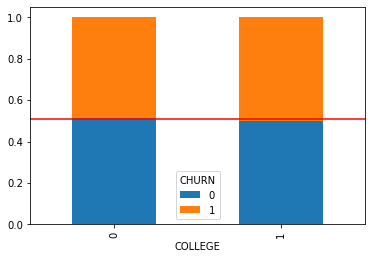

In [68]:
# 1) 집계
tmp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

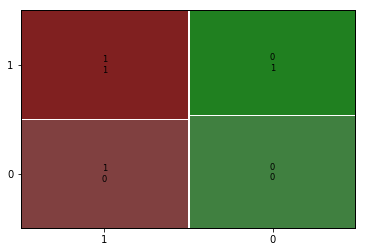

In [69]:
mosaic(mobile,[feature, target])

# 평균선 추가
# plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 모든 선택지에서 이탈한 고객과 이탈하지 않은 고객이 1:1의 비율에 가깝다.
> * 대학 졸업 여부는 실제 이탈 여부에 영향을 끼치지 않는다.

③ 가설검정(카이제곱검정)

In [70]:
table = pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * p-value가 0.02로 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 지지한다.
> * 검정결과 p-value의 값이 0에 가까우므로 대학 졸업 여부가 이탈여부에 영향을 미친다고 할 수 있다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) feature --> CHURN


In [53]:
feature = 'OVERAGE'

① 그래프 : histogram, densityplot

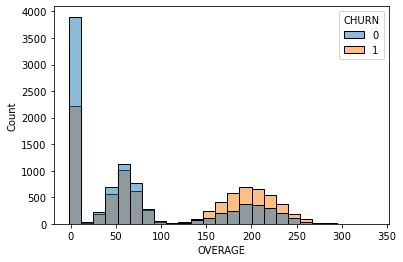

In [54]:
# histogram 시각화 분석
sns.histplot(x = feature, data = mobile, hue = target) # hue : target 별로 나눠서 그리기
plt.show()

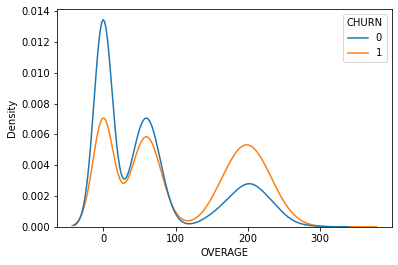

In [55]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 월 초과사용 시간이 150분을 넘어가는 고객들의 이탈이 많다.
> * 사용량이 많은 고객들의 이탈률이 높은 것은 회사입장에서 큰 손해이기 때문에 빠른 개선이 필요하다.

② 수치화 : 로지스틱회귀

In [56]:
model = mobile.loc[mobile[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print('-'*30)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
------------------------------
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value가 유의수준 0.05보다 작으므로 대립가설을 지지한다.
> * 검정결과 p-value의 값이 0에 가까우므로 월 초과 사용시간이 이탈여부에 영향을 미친다고 할 수 있다.

#### 2) feature --> CHURN


In [57]:
feature = 'LEFTOVER'

① 그래프 : histogram, densityplot

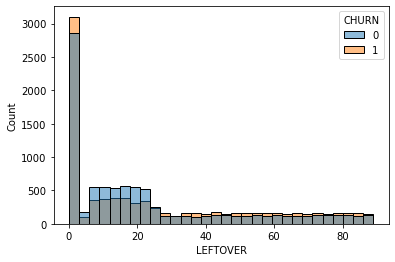

In [58]:
# histogram 시각화 분석
sns.histplot(x = feature, data = mobile, hue = target, bins = 30) # hue : target 별로 나눠서 그리기
plt.show()

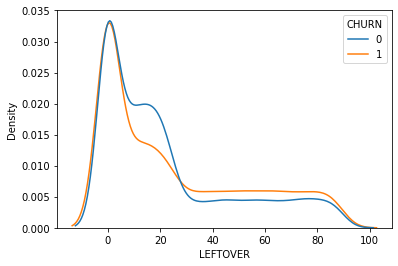

In [59]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 월 잔여 시간에 대해 세 그룹으로 나눠서 분석할 수 있다.
> * 잔여시간이 없는 고객들을 제외하고 대략 25분이하 정도 잔여시간이 있는 고객들은 잔류하는 고객이 이탈하는 고객보다 많다.

② 수치화 : 로지스틱회귀

In [60]:
model = mobile.loc[mobile[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value가 유의수준 0.05보다 작으므로 대립가설을 지지한다.

#### 3) feature --> CHURN


In [61]:
feature = 'AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

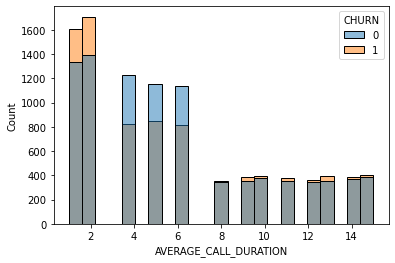

In [62]:
# histogram 시각화 분석
sns.histplot(x = feature, data = mobile, hue = target) # hue : target 별로 나눠서 그리기
plt.show()

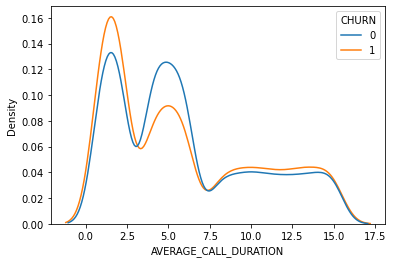

In [63]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 평균 통화시간이 고객 이탈여부에 약한 영향을 미칠 수 있음.

② 수치화 : 로지스틱회귀

In [64]:
model = mobile.loc[mobile[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value가 유의수준 0.05보다 작으므로 대립가설을 지지한다.

## 4.관계 정리

### 1) 강한관계의 변수

> OVERAGE, LEFTOVER

### 2) 약한관계의 변수

> AVERAGE_CALL_DURATION

### 3) 관계 없음

> REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN